In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

glass = pd.read_csv('/content/glass.csv')
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [2]:
glass.Type.value_counts().sort_index()

Type
1    70
2    76
3    17
5    13
6     9
7    29
Name: count, dtype: int64

In [3]:
glass['household'] = glass.Type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.household.value_counts()

household
0    163
1     51
Name: count, dtype: int64

In [4]:
glass.sort_values( by = 'Al', inplace=True)
X= np.array(glass.Al).reshape(-1,1)
y = glass.household

In [5]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X,y)
pred = logreg.predict(X)
logreg.coef_, logreg.intercept_

(array([[3.11517927]]), array([-6.00934605]))

Text(0, 0.5, 'household')

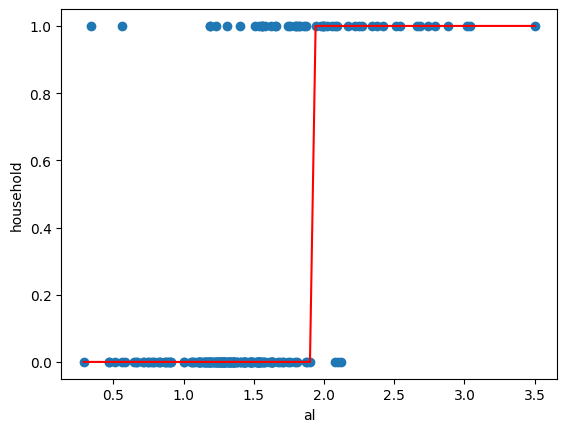

In [6]:
glass.sort_values( by = 'Al', inplace=True)
# Plot the class predictions.

plt.scatter(glass.Al, glass.household)
plt.plot(glass.Al, pred, color='red')
plt.xlabel('al')
plt.ylabel('household')

1)Try different thresholds for computing predictions using 'Al' column. By default it is 0.5. Use predict_proba function to compute probabilities and then try custom thresholds and see their impact on Accuracy, Precision and Recall.

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [10]:
y_probs = model.predict_proba(X_test)[:, 1]

In [11]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score

def evaluate_thresholds(thresholds):
    results = []
    for threshold in thresholds:
        y_pred = (y_probs >= threshold).astype(int)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, zero_division=0)
        recall = recall_score(y_test, y_pred)
        results.append({'Threshold': threshold, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall})
    return results

thresholds = np.arange(0.1, 1, 0.1)
results = evaluate_thresholds(thresholds)


In [12]:
results_df = pd.DataFrame(results)
print(results_df)

   Threshold  Accuracy  Precision    Recall
0        0.1  0.418605   0.305556  1.000000
1        0.2  0.767442   0.523810  1.000000
2        0.3  0.813953   0.600000  0.818182
3        0.4  0.860465   0.727273  0.727273
4        0.5  0.883721   0.875000  0.636364
5        0.6  0.837209   0.833333  0.454545
6        0.7  0.837209   1.000000  0.363636
7        0.8  0.790698   1.000000  0.181818
8        0.9  0.790698   1.000000  0.181818


- The highest accuracy is achieved at a threshold of 0.5 (88.37%)
- Accuracy generally increases from a threshold of 0.1 to 0.5, then begins to decrease as the threshold continues to rise.

- Precision improves significantly as the threshold increases, reaching 100% at a threshold of 0.7 and above. This means that at higher thresholds, while fewer positive predictions are made, almost all of them are correct

- Recall is highest (100%) at lower thresholds (0.1 and 0.2), indicating that the model identifies all actual positives, but at the cost of also misclassifying more negatives as positives (lower precision).
- As the threshold increases, recall decreases, indicating that while the predictions are more reliable, some positive cases are missed.

2)Do the same analysis for other columns

In [29]:
features = ['Na', 'Mg', 'Si', 'K', 'Ca', 'Ba', 'Fe']
feature_results = {}

# Loop through each feature
for feature in features:
    try:
        X = glass[[feature]]
        y = glass['household']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        model = LogisticRegression(random_state=42)
        model.fit(X_train, y_train)

        # Predict probabilities for the positive class
        y_probs = model.predict_proba(X_test)[:, 1]

        thresholds = np.arange(0.1, 1, 0.1)
        results = []
        for threshold in thresholds:
            y_pred = (y_probs >= threshold).astype(int)
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, zero_division=0)
            recall = recall_score(y_test, y_pred)
            results.append({'Threshold': threshold, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall})

        results_df = pd.DataFrame(results)
        feature_results[feature] = results_df
    except Exception as e:
        print(f"An error occurred with feature {feature}: {e}")

for feature, results_df in feature_results.items():
    print(f"Results for {feature}:")
    print(results_df.to_string(index=False))

Results for Na:
 Threshold  Accuracy  Precision   Recall
       0.1  0.465116   0.300000 0.818182
       0.2  0.767442   0.533333 0.727273
       0.3  0.860465   0.727273 0.727273
       0.4  0.883721   0.800000 0.727273
       0.5  0.883721   0.875000 0.636364
       0.6  0.813953   0.800000 0.363636
       0.7  0.790698   1.000000 0.181818
       0.8  0.744186   0.000000 0.000000
       0.9  0.744186   0.000000 0.000000
Results for Mg:
 Threshold  Accuracy  Precision   Recall
       0.1  0.883721   0.687500 1.000000
       0.2  0.930233   0.785714 1.000000
       0.3  0.883721   0.750000 0.818182
       0.4  0.860465   0.727273 0.727273
       0.5  0.837209   0.700000 0.636364
       0.6  0.837209   0.700000 0.636364
       0.7  0.860465   0.777778 0.636364
       0.8  0.860465   0.777778 0.636364
       0.9  0.744186   0.000000 0.000000
Results for Si:
 Threshold  Accuracy  Precision   Recall
       0.1  0.255814   0.230769 0.818182
       0.2  0.372093   0.233333 0.636364
       0.

3)Fit a Logistic Regression Model on all features. Remember to preprocess data(eg. normalization and one hot encoding).

In [30]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [31]:
X = glass.drop(['Type', 'household'], axis=1)
y = glass['household']

In [32]:
numerical_cols = X.columns

In [34]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols)
    ])

In [35]:
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_pipeline.fit(X_train, y_train)

y_pred = model_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91        32
           1       0.78      0.64      0.70        11

    accuracy                           0.86        43
   macro avg       0.83      0.79      0.80        43
weighted avg       0.86      0.86      0.86        43



- when our logistic regression model predicts an instance as household glass, it is correct approximately 78% of the time.
- out of all the actual household glass instances in the test data, the model correctly identified 64% of them
- An F1-score of 70% suggests a reasonable balance between precision and recall but indicates room for improvement in model performance for household glass, as it suggests that both false positives (non-household glass predicted as household glass) and false negatives (household glass not recognized) are affecting the model.
- Overall, the model correctly predicts both household and non-household glass 86% of the time across all predictions made.